In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os, sys                                         # Modules to see files and folders in directories
from os.path import dirname as parent_folder
from scipy.stats import pearsonr
# plt.close('all')

In [2]:
sys.path.append('../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
r = np.random             # Random generator
r.seed(42)                # Set a random (but fixed) seed

font_size = 10

In [5]:
Verbose = False
Saveplots = True

In [6]:
IncludeSignalInData = False
IncludeSignalInFit = False

In [7]:
# ----------------------------------------------------------------------------------- #
#
#  Script for reading data for the Applied Statistics problem on "UFO Sightings".
#
#  Some of the less intuitive columns are codified as follows:
#    DayInYear: 1st of January=1, 2nd of January=2, ..., 31st of December=365 or 366
#    DayOfWeek: Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6
#    UScoast: Non-coast=0, WestCoast=1, EastCoast=2
#
#  Author: Troels C. Petersen (NBI)
#  Email:  petersen@nbi.dk
#  Date:   1st of December 2019
# ----------------------------------------------------------------------------------- #

import numpy as np

verbose = True
N_verbose = 30
filename = 'data_UfoSightings.txt'

date = []
HourInDay = []
DayInYear = []
DayOfWeek = []
USstate = []
UScoast = []
Shape = []
DurationInSec = []


with open(filename, 'r' ) as infile:
    header1 = infile.readline()     # Read (and ignore) the first four line, which are header lines!
    header2 = infile.readline()     # These explain what the data/columns contains.
    header3 = infile.readline()
    header4 = infile.readline()
    if verbose:
        print('Date            HourInDay       DayInYear       DayOfWeek       USstate         UScoast         Shape           DurationInSec')
        
    counter = 0
    for line in infile:
        
        columns = line.strip().split()
        if (len(columns) == 8):
            
            date.append(columns[0])
            HourInDay.append(float(columns[1]))
            DayInYear.append(int(columns[2]))
            DayOfWeek.append(int(columns[3]))
            USstate.append(columns[4])
            UScoast.append(int(float(columns[5])))
            Shape.append(columns[6])
            DurationInSec.append(float(columns[7]))
            
            counter += 1
            
            if verbose and counter < N_verbose:
                print(f"""{date[-1]} \t{HourInDay[-1]:.1f} \t\t{DayInYear[-1]} \t\t{DayOfWeek[-1]} \t\t{USstate[-1]} \t\t{UScoast[-1]} \t\t{Shape[-1]:10s} \t{DurationInSec[-1]}""")

print(f"The total number of data points read is: {counter:d}")

# Convert everything to numpy arrays:
date = np.array(date)
HourInDay = np.array(HourInDay)
DayInYear = np.array(DayInYear)
DayOfWeek = np.array(DayOfWeek)
USstate = np.array(USstate)
UScoast = np.array(UScoast)
Shape = np.array(Shape)
DurationInSec = np.array(DurationInSec)

Date            HourInDay       DayInYear       DayOfWeek       USstate         UScoast         Shape           DurationInSec
1/4/2019 	0.2 		4 		4 		MO 		0 		Rectangle  	20.0
1/3/2019 	20.5 		3 		3 		TN 		0 		Disk       	1.0
1/3/2019 	20.0 		3 		3 		IL 		0 		Triangle   	20.0
1/3/2019 	17.3 		3 		3 		MA 		2 		Diamond    	120.0
1/3/2019 	15.0 		3 		3 		CA 		1 		Oval       	1800.0
1/3/2019 	6.0 		3 		3 		ND 		0 		Light      	30.0
1/3/2019 	4.6 		3 		3 		CA 		1 		Circle     	1200.0
1/3/2019 	2.8 		3 		3 		AZ 		0 		Unknown    	300.0
1/1/2019 	0.4 		1 		1 		ID 		0 		Light      	180.0
1/1/2019 	0.1 		1 		1 		FL 		2 		Circle     	180.0
12/31/2018 	23.0 		365 		0 		FL 		2 		Light      	300.0
12/31/2018 	21.8 		365 		0 		MS 		0 		Unknown    	300.0
12/31/2018 	21.8 		365 		0 		SC 		2 		Sphere     	10.0
12/31/2018 	21.7 		365 		0 		FL 		2 		Fireball   	20.0
12/31/2018 	20.2 		365 		0 		CT 		2 		Circle     	20.0
12/31/2018 	19.5 		365 		0 		FL 		2 		Unknown    	600.0
12/31/2018 	6.8 		365 		0 		CA

In [8]:
#plt.plot(DurationInSec)
#plt.hist(DurationInSec, bins=200)  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.Text(0.5, 1.0, "Histogram with 'auto' bins")
#plt.xlabel('duration in seconds')
#plt.ylabel('counts')
#plt.show()

In [9]:
#min(DurationInSec)
#np.max(DurationInSec)

DurationInSec.sort()
print(DurationInSec)

[0.00e+00 1.00e+00 1.00e+00 ... 4.32e+04 5.04e+04 6.48e+04]


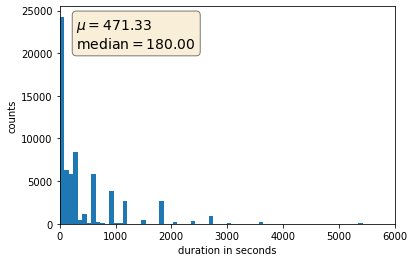

In [10]:
fig, ax = plt.subplots()
x = DurationInSec#30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
#sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, )))
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

#ax.plot(x,'b.')
ax.hist(x, 800)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel('duration in seconds')
ax.set_ylabel('counts')
ax.set_xlim(0,6000)

plt.show()
#fig.savefig("duration_obs.pdf", bbox_inches='tight')

In [11]:
#UScoast==1 # west coast
#index=UScoast.index('1')

np.where(UScoast == 1)

(array([    4,     6,    16, ..., 64696, 64702, 64709], dtype=int64),)

In [12]:
westcoast=DurationInSec[np.where(UScoast == 1)]
eastcoast=DurationInSec[np.where(UScoast == 2)]

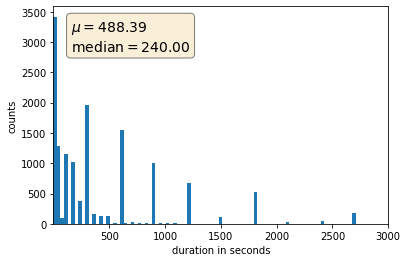

In [13]:
fig2, ax2 = plt.subplots()
xw = DurationInSec[np.where(UScoast == 1)]#westcoast#30*np.random.randn(10000)
muw = xw.mean()
medianw = np.median(xw)
#sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (muw, ),
    r'$\mathrm{median}=%.2f$' % (medianw, )))
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

#ax2.plot(xw)#
ax2.hist(xw, 800)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.set_xlabel('duration in seconds')
ax2.set_ylabel('counts')
#ax2.set_title('West Coast')
ax2.set_xlim(1,3000)

plt.show()
#fig.savefig("foo1.pdf", bbox_inches='tight')

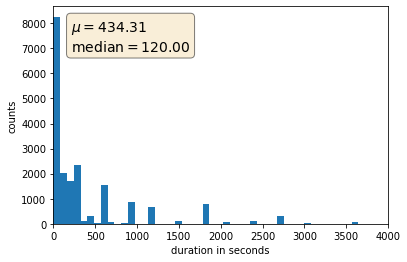

In [14]:
#plt.figure(figsize=(7, 4))
#ax = plt.subplot(121)
fig3, ax3 = plt.subplots()
xe = DurationInSec[np.where(UScoast == 2)]#30*np.random.randn(10000)
mue = xe.mean()
mediane = np.median(xe)
#sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mue, ),
    r'$\mathrm{median}=%.2f$' % (mediane, )))
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

#ax3.plot(xe)#
ax3.hist(xe, 800)
#plt.hist(xe, 800)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax3.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax3.set_xlabel('duration in seconds')
ax3.set_ylabel('counts')
#ax2.set_Title('West Coast')
ax3.set_xlim(0,4000)

#plt.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
#plt.xlabel('duration in seconds')
#plt.ylabel('counts')
#ax2.set_Title('West Coast')
#plt.xlim(0,4000)

#plt.show()
#fig.savefig("foo1.pdf", bbox_inches='tight')

#fig4, ax4 = 
#plt.subplots(122)
#xww = DurationInSec[np.where(UScoast == 2)]#30*np.random.randn(10000)
#yww= DayOfWeek[np.where(UScoast == 2)]

#muww = yww.mean()
#medianww = np.median(yww)
#sigma = x.std()
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (muww, ),
#    r'$\mathrm{median}=%.2f$' % (medianww, )))
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

#ax4.plot(yww)
#ax4.
#plt.hist(yww, 800)
# these are matplotlib.patch.Patch properties
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
#ax4.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
#ax4.set_xlabel('duration in seconds')
#ax4.set_ylabel('counts')
#ax2.set_title('West Coast')
# place a text box in upper left in axes coords
#plt.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
#plt.xlabel('duration in seconds')
#plt.ylabel('counts')
#ax2.set_title('West Coast')

plt.show()


In [15]:
data1=DayInYear
data2=HourInDay

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.024


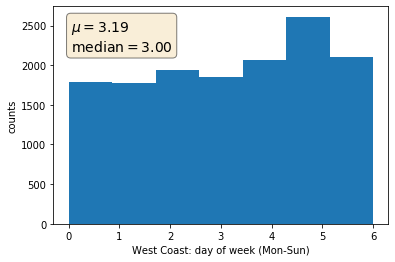

In [16]:
fig4, ax4 = plt.subplots()
#xww = DurationInSec[np.where(UScoast == 2)]#30*np.random.randn(10000)
yww= DayOfWeek[np.where(UScoast == 1)]

muww = yww.mean()
medianww = np.median(yww)
#sigma = x.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (muww, ),
    r'$\mathrm{median}=%.2f$' % (medianww, )))
#textstr = '\n'.join((
#    r'$\mu=%.2f$' % (mu, ),
#    r'$\mathrm{median}=%.2f$' % (median, ),
#    r'$\sigma=%.2f$' % (sigma, )))

#ax4.plot(yww)
ax4.hist(yww, 7)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax4.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax4.set_xlabel('West Coast: day of week (Mon-Sun)')
ax4.set_ylabel('counts')
#ax2.set_title('West Coast')

plt.show()
fig4.savefig("dayofweek.pdf", bbox_inches='tight')

In [17]:
#yww= yww[np.where(UScoast == 1)]

In [18]:
np.max(yww)

6

In [19]:
mt=np.array(np.where(yww<=3))

mumt = mt.mean()
medianmt = np.median(mt)
print(mumt,medianmt)


7199.634696372776 7270.0


In [20]:
# Fill 1d histograms:
def create_1d_hist(ax, values, bins, x_range, title):
    ax.hist(values, bins, x_range, histtype='step', normed=False, lw=2)         
    ax.set(xlim=x_range, title=title)
    hist_data = np.histogram(values, bins, x_range)
    return hist_data

In [32]:
# Calculate the ChiSquare value for comparison of histogram with constant.
# This is not a fit, as there are no free parameters: We know the number of events and bins!
def get_chi2_ndf( hist, const):
    #data = hist[0]
    data = hist
    const_unnormed = const * data.sum() # if we have uniform distribution then const=1/10
    chi2 = np.sum( (data - const_unnormed)**2 / data )
    ndof = data.size
    return chi2, ndof

In [33]:
N_bins=7
NA,_=np.histogram(yww,bins=N_bins)
print('frequecy of each bin',NA)
chi2A, ndofA=get_chi2_ndf(NA,1/7)
#chi2[1]=get_chi2_ndf(N,1)
print('chi2',chi2A)
print('ndof',ndofA)

p_chi2A = stats.chi2.sf(chi2A, ndofA) 
print('p-val',p_chi2A) 

frequecy of each bin [1791 1773 1945 1852 2070 2611 2097]
chi2 219.5989526548046
ndof 7
p-val 8.02653122767144e-44


In [34]:
len(yww)

14139

In [35]:
NA[0:4]

array([1791, 1773, 1945, 1852], dtype=int64)

In [36]:
N_bins=4
#NA,_=np.histogram(yww,bins=N_bins)
print('frequecy of each bin',NA[0:4])
chi2AA, ndofAA=get_chi2_ndf(NA[0:4],1/4)
#chi2[1]=get_chi2_ndf(N,1)
print('chi2',chi2AA)
print('ndof',ndofAA)

p_chi2AA = stats.chi2.sf(chi2AA, ndofAA) 
print('p-val',p_chi2AA) 

frequecy of each bin [1791 1773 1945 1852]
chi2 9.621071020456892
ndof 4
p-val 0.04731808200288284
